In [68]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 


plt.style.use('classic')

PATH = 'C:/WorkSpace/StatisticsForData/data/'

# Resampling

In [16]:

session_times = pd.read_csv(PATH+'web_page_data.csv')
session_times.Time *= 100
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


<Figure size 504x360 with 0 Axes>

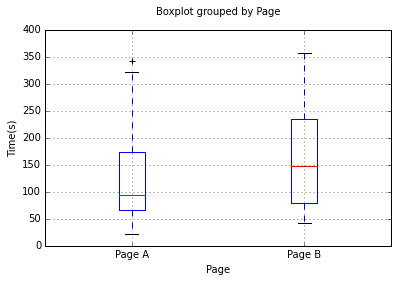

In [26]:
# A보다 B에서 좀더 많이 머무는 경향이 있다.
plt.figure(figsize = (7,5))
session_times.boxplot(by = 'Page', column='Time')
plt.ylabel('Time(s)')
plt.title('')
plt.show()

In [62]:
meanA = session_times.groupby('Page').mean().values[0][0]
meanB = session_times.groupby('Page').mean().values[1][0]
print(meanA, meanB)

126.33333333333333 162.0


In [66]:
na = session_times.groupby('Page').count().values[0][0]
nb = session_times.groupby('Page').count().values[1][0]
print(na,nb)

21 15


## 순열 검정
### 두개 이상의 표본을 재결합하여 무작위 재샘플링한다.
### 무작위로 재샘플링된 표본을 원래의 표본과 비교한다.

In [63]:
import random
def perm_fun(x, nA, nB) :
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B, 'Time'].mean() - x.loc[idx_A,'Time'].mean()

In [69]:
# 오래 걸림(40s)
# perm_diffs = [perm_fun(session_times, na, nb) for _ in range(1000)]

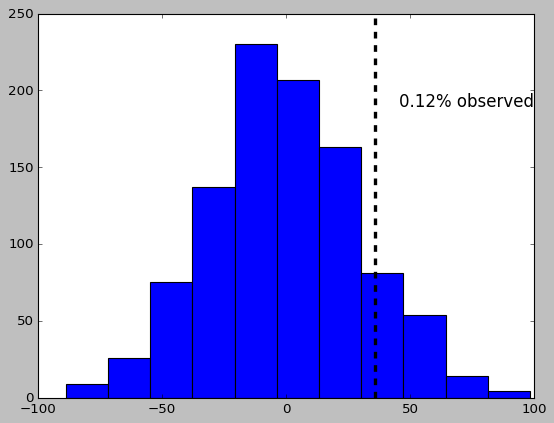

In [94]:
pct = np.bincount(perm_diffs > (meanB-meanA))[1] / 1000
plt.hist(perm_diffs, bins = 11)
plt.axvline(x = meanB-meanA, color = 'k', lw = 3, ls = '--')
plt.text(meanB-meanA + 10,190, f"{pct}% observed", fontdict={"fontsize" : 15})
plt.show()

0.12